# Create Eastern boundary condition for Pb (in Arctic Ocean)

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
# import seaborn as sns
import csv
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")
import pandas
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [62]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### Extended domain:

In [2]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [44]:
nav_lev = mesh.variables['nav_lev']
hdept = mesh.variables['hdept']

In [45]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)
nav_lev = np.array(nav_lev)
hdept = np.array(hdept)
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

In [4]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[0,:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
Z_masked = np.ma.masked_where(cond, tmask) 

### Pb data from Rob Rember:

In [5]:
Pb_file = '/ocean/brogalla/GEOTRACES/data/Pb_rob_rember.csv'

df = pandas.read_csv(Pb_file, parse_dates=['DATE'])
df = df[0:338]
df.head()

,STNNBR,CASTNO,CTDDEPTH,GEOTRC_EVENTNO,DATE,TIME,LATITUDE,LONGITUDE,CTDPRS,Pb_(pMol)
0,1,1.0,18.4,6009.0,2015-08-12,1633.0,60.2579,-179.0832,18.5,10.55
1,1,1.0,19.3,6009.0,2015-08-12,1633.0,60.2579,-179.0832,19.5,12.05
2,1,1.0,20.0,6009.0,2015-08-12,1633.0,60.2579,-179.0832,20.2,18.55
3,1,1.0,20.4,6009.0,2015-08-12,1633.0,60.2579,-179.0832,20.6,18.85
4,1,1.0,20.6,6009.0,2015-08-12,1633.0,60.2579,-179.0832,20.8,18.75


In [6]:
ARC001_depths = df['CTDDEPTH']
ARC001_lats = df['LATITUDE']
ARC001_lons = df['LONGITUDE']
ARC001_dPb = df['Pb_(pMol)']
print(ARC001_depths.shape, ARC001_lats.shape, ARC001_lons.shape, ARC001_dPb.shape)

(338,) (338,) (338,) (338,)


In [7]:
ARC001_depths = np.array(ARC001_depths)
ARC001_lats   = np.array(ARC001_lats)
ARC001_lons   = np.array(ARC001_lons)
ARC001_dPb    = np.array(ARC001_dPb)

#### Cruise stations:

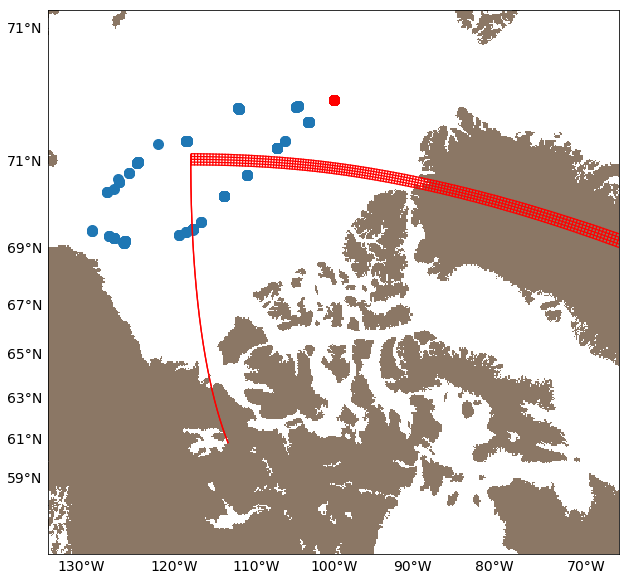

In [66]:
fig, ax1 = plt.subplots(figsize=(12,10))

proj2 = Basemap(projection='stere',lat_0 = 78, lon_0 = -100, resolution='i', width=4.2e6, height=4.0e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'l')

x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)

x=x_mesh
y=y_mesh
res=10

# plot station locations:
x_data, y_data = proj2(ARC001_lons, ARC001_lats)
proj2.plot(x_data, y_data, '.', markersize=20)
proj2.plot(x_data[144:168], y_data[144:168], '.r', markersize=20)

# sub-domain:
l1=1100
proj2.plot(x[2051,200:799]    , y[2051,200:799]    , 'r-', lw=1.3);
proj2.plot(x[2051,200:799].T  , y[2051,200:799].T  , 'r-', lw=1.3);
proj2.plot(x[l1:2051:5,780:801:5]    , y[l1:2051:5,780:801:5]    , 'r-', lw=1.3);
proj2.plot(x[l1:2051:5,780:801:5].T  , y[l1:2051:5,780:801:5].T  , 'r-', lw=1.3);

Vertical profile:

(0, 10)

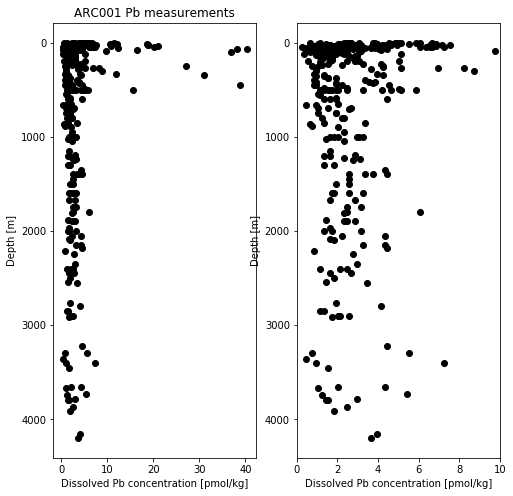

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,8))

# b = sorted((i,j) for i,j in zip(y,x))
# y1, x1 = zip(*b)
#
ax[0].plot(ARC001_dPb, ARC001_depths, '.k', markersize=12)
ax[0].set_title('ARC001 Pb measurements')
ax[0].set_xlabel('Dissolved Pb concentration [pmol/kg]')
ax[0].set_ylabel('Depth [m]')
ax[0].invert_yaxis()

ax[1].plot(ARC001_dPb, ARC001_depths, '.k', markersize=12)
ax[1].set_xlabel('Dissolved Pb concentration [pmol/kg]')
ax[1].set_ylabel('Depth [m]')
ax[1].invert_yaxis()
ax[1].set_xlim([0, 10])

In [9]:
def distance_func(lon1, lon2, lat1, lat2):
    # approximate radius of earth in km
    R = 6373.0

    dlon = lon2 - lon1 
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [10]:
distance = np.zeros(ARC001_lons.shape)
for i in range(1,338):
    if ARC001_lons[i] != ARC001_lons[i-1]:
        distance[i] = distance[i-1] + \
                      distance_func(ARC001_lons[i-1], ARC001_lons[i], ARC001_lats[i-1], ARC001_lats[i])
    else:
        distance[i] = distance[i-1]

Cross-section plot

In [59]:
def find_closest_model_point(
    lon, lat, model_lons, model_lats, grid='NEMO', land_mask=None,
    tols={
        'NEMO': {'tol_lon': 0.104, 'tol_lat': 0.0488},
        'GEM2.5': {'tol_lon': 0.016, 'tol_lat': 0.012},
        }
):
    """Returns the grid coordinates of the closest model point
    to a specified lon/lat. If land_mask is provided, returns the closest
    water point.
    """

    if grid not in tols:
        raise KeyError(
            'The provided grid type is not in tols. '
            'Use another grid type or add your grid type to tols.')

    # Search for a grid point with longitude and latitude within
    # tolerance of measured location
    j_list, i_list = np.where(
        np.logical_and(
            (np.logical_and(model_lons > lon - tols[grid]['tol_lon'],
                            model_lons < lon + tols[grid]['tol_lon'])),
            (np.logical_and(model_lats > lat - tols[grid]['tol_lat'],
                            model_lats < lat + tols[grid]['tol_lat']))
        )
    )

    if len(j_list) == 0:
        # Added by BMM March 2017
        # If including points outside of domain:
        return np.nan, np.nan
        # raise ValueError(
        #    'No model point found. tol_lon/tol_lat too small or '
        #    'lon/lat outside of domain.')
    try:
        j, i = map(np.asscalar, (j_list, i_list))
    except ValueError:
        # Several points within tolerance
        # Calculate distances for all and choose the closest

        # Avoiding array indexing because some functions
        # pass in model_lons and model_lats as netcdf4 objects
        # (which treat 'model_lons[j_list, i_list]' differently)
        lons = [model_lons[j_list[n], i_list[n]] for n in range(len(j_list))]
        lats = [model_lats[j_list[n], i_list[n]] for n in range(len(j_list))]
        dists = haversine(
            np.array([lon] * i_list.size), np.array([lat] * j_list.size),
            lons, lats)
        n = dists.argmin()
        j, i = map(np.asscalar, (j_list[n], i_list[n]))

    # If point is on land and land mask is provided
    # try to find closest water point
    if land_mask is None or not land_mask[j, i]:
        return j, i
    try:
        return _spiral_search_for_closest_water_point(
            j, i, land_mask, lon, lat, model_lons, model_lats)
    except ValueError:
        raise ValueError(
            'lat/lon on land and no nearby water point found')


In [60]:
def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance in kilometers between two points
    on a sphere from their longitudes and latitudes.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [71]:
# find coordinates closest to lats and lons of ARC001
ii = np.zeros(ARC001_lons.shape)
jj = np.zeros(ARC001_lons.shape)
for i in range(0,len(ARC001_lons)):
    i1, j1 = find_closest_model_point(ARC001_lons[i], ARC001_lats[i], mlons, mlats)
    ii[i] = i1
    jj[i] = j1

# find sea floor depth at these coordinates:
depth_ocean = np.zeros(ARC001_lons.shape)
for i in range(0,len(ii)):
    for j in jj:
        if np.isnan(ii[i]) or np.isnan(j):
            depth_ocean[i] = np.nan
        else:
            depth_ocean[i] = hdept[0,ii[i],j]        

Text(0,0.5,'Depth [m]')

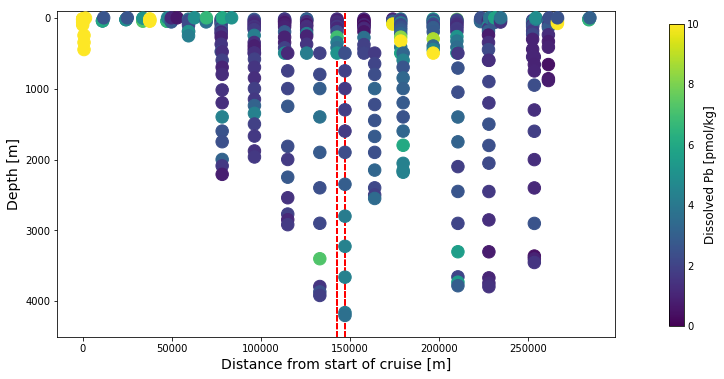

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(distance, ARC001_depths, c=ARC001_dPb, vmin=0, vmax=10, s=155, zorder=3)
ax.plot([distance[144:168], distance[144:168]], [4500, -100],'--r',zorder=2)
ax.invert_yaxis()
ax.set_xlabel('Distance from start of cruise [m]', fontsize=14)
ax.set_ylim([4500,-100])
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(scat, ax=ax, cax=cbaxes) 
CBar.set_label('Dissolved Pb [pmol/kg]', fontsize=12)
CBar.ax.tick_params(axis='y', length=0.1)
ax.set_ylabel('Depth [m]', fontsize=14)

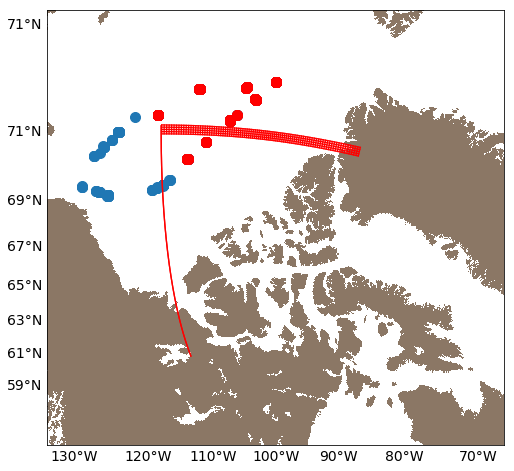

In [82]:
fig, ax1 = plt.subplots(figsize=(10,8))

proj2 = Basemap(projection='stere',lat_0 = 78, lon_0 = -100, resolution='i', width=4.2e6, height=4.0e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="#ffffff", resolution = 'l')

x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)

x=x_mesh
y=y_mesh
res=10

# plot station locations:
x_data, y_data = proj2(ARC001_lons, ARC001_lats)
proj2.plot(x_data, y_data, '.', markersize=20)
proj2.plot(x_data[80:250], y_data[80:250], '.r', markersize=20)

# sub-domain:
l1=1600
proj2.plot(x[2051,200:799]    , y[2051,200:799]    , 'r-', lw=1.3);
proj2.plot(x[2051,200:799].T  , y[2051,200:799].T  , 'r-', lw=1.3);
proj2.plot(x[l1:2051:5,780:801:5]    , y[l1:2051:5,780:801:5]    , 'r-', lw=1.3);
proj2.plot(x[l1:2051:5,780:801:5].T  , y[l1:2051:5,780:801:5].T  , 'r-', lw=1.3);

Boundary thickness is 20

In [83]:
boundary_lats = mesh_lat[1600:2051:5,779:799]
boundary_lons = mesh_lon[1600:2051:5,779:799]
print(boundary_lats.shape)
print(boundary_lons.shape)

(91, 20)
(91, 20)


Plot profiles along the boundary:

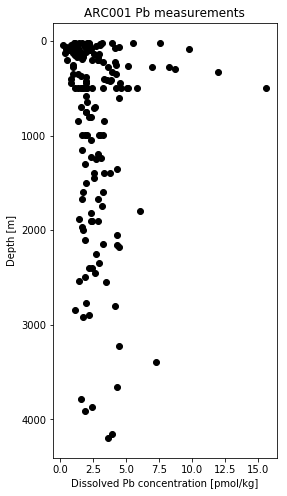

In [85]:
fig, ax = plt.subplots(figsize=(4,8))

ax.plot(ARC001_dPb[80:250], ARC001_depths[80:250], '.k', markersize=12)
ax.set_title('ARC001 Pb measurements')
ax.set_xlabel('Dissolved Pb concentration [pmol/kg]')
ax.set_ylabel('Depth [m]')
ax.invert_yaxis()

Text(0,0.5,'Depth [m]')

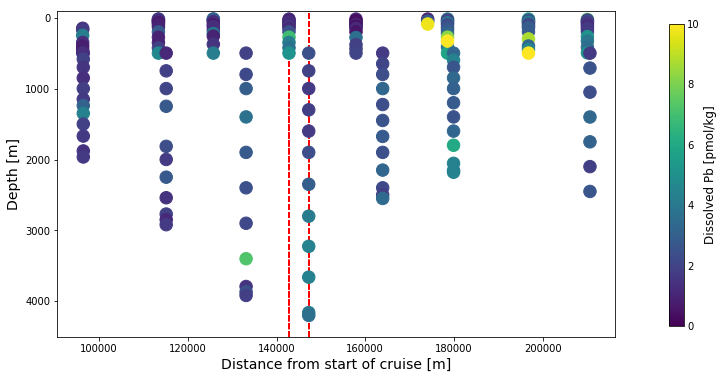

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
scat = ax.scatter(distance[80:250], ARC001_depths[80:250], c=ARC001_dPb[80:250], vmin=0, vmax=10, s=155, zorder=3)
ax.plot([distance[144:168], distance[144:168]], [4500, -100],'--r',zorder=2)
ax.invert_yaxis()
ax.set_xlabel('Distance from start of cruise [m]', fontsize=14)
ax.set_ylim([4500,-100])
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(scat, ax=ax, cax=cbaxes) 
CBar.set_label('Dissolved Pb [pmol/kg]', fontsize=12)
CBar.ax.tick_params(axis='y', length=0.1)
ax.set_ylabel('Depth [m]', fontsize=14)

#### Create one vertical profile of dissolved Pb for the eastern boundary condition:

Interpolate the Pb data at the boundary. First interpolate the profiles.

In [90]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    """

    if x.ndim != 1:
        raise ValueError#, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError#, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError#, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

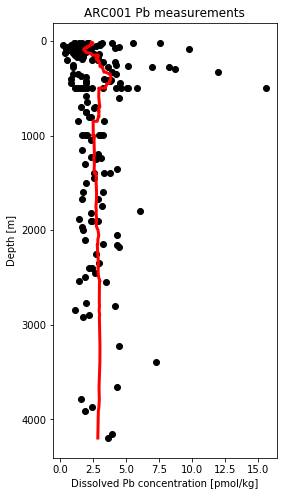

In [123]:
fig, ax = plt.subplots(figsize=(4,8))

ax.plot(ARC001_dPb[80:250], ARC001_depths[80:250], '.k', markersize=12)
ax.set_title('ARC001 Pb measurements')
ax.set_xlabel('Dissolved Pb concentration [pmol/kg]')
ax.set_ylabel('Depth [m]')
ax.invert_yaxis()

# moving average:\
x = ARC001_dPb[80:250]
y = ARC001_depths[80:250]
b = sorted((i,j) for i,j in zip(y,x))
y1, x1 = zip(*b)
x1 = np.array(x1)
y1 = np.array(y1)

x1_ave = smooth(x1, window_len=40, window='flat')
x1_smoothed = x1_ave[20:-19]
plt.plot(x1_smoothed, y1, '-r', linewidth=3.0)

# b = sorted((i,j) for i,j in zip(y,x))
# y1, x1 = zip(*b)
# plt.plot(x1, y1, '.k', markersize=12)

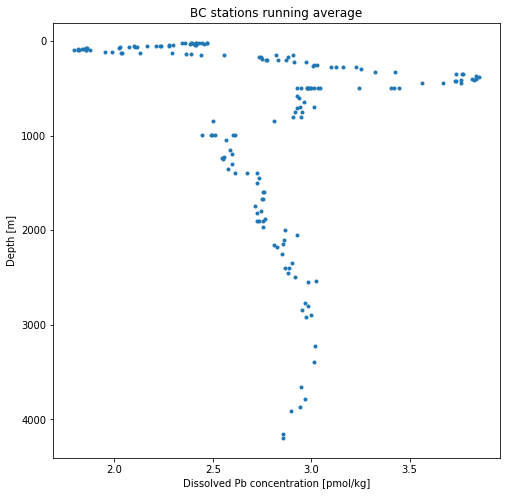

In [124]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.plot(x1_smoothed, y1, '.') #linewidth=3.5)

plt.title('BC stations running average')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

Now interpolate to the model grid depths:

In [135]:
mesh = '/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12/ANHA12-EXH006_5d_gridT_y2002m01d05.nc'
m = nc.Dataset(mesh)
mdepth = m.variables['deptht']
mlons = m.variables['nav_lon']
mlats = m.variables['nav_lat']
mdepth = np.array(mdepth)
mlons = np.array(mlons)
mlats = np.array(mlats)

In [136]:
def interp_depths(var, mdepth, fill):
    # constant extrapolation for values outside of the range
    from scipy import interpolate
    
    interp_var = np.empty(mdepth.shape)
    x = y1

    y = var[:]
    f = interpolate.interp1d(x, y, fill_value = fill)
    interp_var[:] = f(mdepth)
    return interp_var

In [137]:
Pb_diss_int = interp_depths(x1_smoothed, mdepth, fill='extrapolate')
Pb_diss_int = np.array(Pb_diss_int)

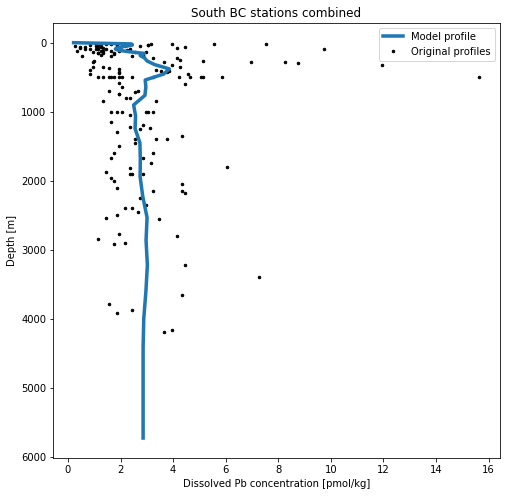

In [128]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.plot(Pb_diss_int, mdepth, '-', linewidth=3.5, zorder=2, label = 'Model profile')
plt.plot(x1, y1, '.k', markersize=5, zorder=1, label = 'Original profiles')

plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.legend()

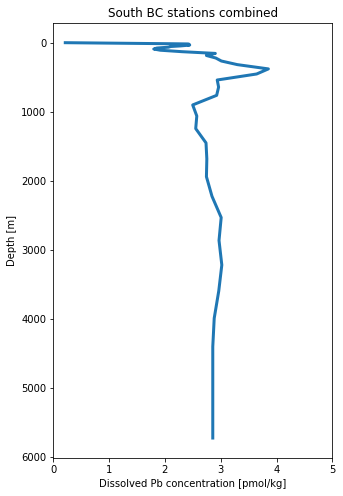

In [129]:
fig, ax1 = plt.subplots(figsize=(5,8))
plt.plot(Pb_diss_int, mdepth, '-', linewidth=3, zorder=1)
plt.title('South BC stations combined')
plt.xlabel('Dissolved Pb concentration [pmol/kg]')
plt.ylabel('Depth [m]')
plt.xlim([0,5])
plt.gca().invert_yaxis()

Now I need to add this profile for every gridpoint on the boundary.

### Boundary condition:

In [130]:
print('Boundary latitudes shape: ', boundary_lats.shape)
print('Boundary longitudes shape: ',boundary_lons.shape)

Boundary latitudes shape:  (91, 20)
Boundary longitudes shape:  (91, 20)


In [131]:
print('final dimension should be 1D of length:', len(boundary_lats[0,:])*len(boundary_lats[:,0]))

final dimension should be 1D of length: 1820


Based on one layer:

In [140]:
dPb_BC = np.zeros((50,1820))
for i in range(0,1820):
    dPb_BC[:,i] = Pb_diss_int

In [141]:
dPb_BC.shape

(50, 1820)

In [142]:
dPb_EBC = np.reshape(dPb_BC, (1,50,1,1820))

## Create BC NetCDF file:

In [33]:
# Load structure from sample dataset:
BZ = mask.dimensions['z']

In [34]:
# Setup the new NetCDF file:
ncd = nc.Dataset('Pb_East_OBC_20181213.nc', 'w', zlib=True)
nc_tools.init_dataset_attrs(
    ncd,
    title='Pb Eastern OBC',
    notebook_name='create_OBC',
    nc_filepath='./create_OBC.nc',
    comment='Eastern boundary')

ncd.createDimension('x', len(boundary_lats[0,:])*len(boundary_lats[:,0]))
ncd.createDimension('y',1)
ncd.createDimension('z',len(BZ))
ncd.createDimension('t',None)

file format: NETCDF4
Conventions: CF-1.6
title: Pb Eastern OBC
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/ccar-modeling/analysis-birgit/src/tip/notebooks/ANHA12/BC/create_OBC.ipynb
references: REQUIRED
history: [2018-12-18 11:04:45] Created netCDF4 zlib=True dataset.
comment: Eastern boundary


<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0

In [35]:
dPb = ncd.createVariable('dPb', 'float64', ('t','z','y','x'))
dPb.units = 'dissolv. Pb'
dPb.long_name = 'dPb'
dPb[:] = dPb_EBC

In [36]:
nc_tools.check_dataset_attrs(ncd)
ncd.close()

Missing value for dataset attribute: references
